In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Análise inicial do dataset

In [2]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

In [5]:
print(f'Primeiras linhas do dataset de treino:')
print(tabulate(train_data.head(), headers='keys', showindex=True, tablefmt='grid'))


Primeiras linhas do dataset de treino:
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+---------+------------+
|    |   PassengerId |   Survived |   Pclass | Name                                                | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Cabin   | Embarked   |
+====+===============+============+==========+=====================================================+========+=======+=========+=========+==================+=========+=========+============+
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | nan     | S          |
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+---------+------------+
|  1 |     

In [ ]:
print("Informações do Dataset:")
display(train_data.info())
display(test_data.info())

In [201]:
print("\nEstatísticas Descritivas:")
display(train_data.describe())
display(test_data.describe())



Estatísticas Descritivas:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [202]:
print("\nValores Ausentes:")
display(train_data.isnull().sum())



Valores Ausentes:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Tratamento de valores ausentes

#### Note que existem 687 valores ausentes na coluna 'Cabin', isso representa 77% das linhas dos dados. Ou seja, temos decidir se vamos excluir essa coluna, preencher valores ausentes (O que para esse tipo de dado, acho que não faz sentido), criar uma nova coluna para representar se o passageiro possui um cabine ou não, ou retirar todas as linhas que possuem valores ausentes (O que remove 77%  das linhas dos dados).

#### Configuração: escolha a opção desejada (1, 2, 3 ou 4)

##### 1 = Excluir a coluna 'Cabin'
##### 2 = Preencher valores ausentes
##### 3 = Criar coluna 'Has_Cabin'
##### 4 = Remover linhas com valores ausentes na coluna 'Cabin'

In [203]:
option = 3

if option == 1:
    train_data_processed = train_data.drop(columns=['Cabin'])
    print("\nOpção 1: Coluna 'Cabin' foi removida.")

elif option == 2:
    train_data_processed = train_data.copy()
    train_data_processed['Cabin'] = train_data_processed['Cabin'].fillna('Unknown')
    print("\nOpção 2: Valores ausentes preenchidos com 'Unknown'.")

elif option == 3:
    train_data_processed = train_data.copy()
    train_data_processed.drop(columns=['Cabin'], inplace=True)
    train_data_processed['Has_Cabin'] = train_data['Cabin'].notnull().astype(int)
    print("\nOpção 3: Coluna 'Has_Cabin' criada para indicar presença de cabine.")

elif option == 4:
    train_data_processed = train_data.dropna(subset=['Cabin'])
    print(f"\nOpção 4: Linhas com valores ausentes removidas. Restam {len(train_data_processed)} linhas.")
    
else:
    print("Opção inválida. Escolha entre 1, 2, 3 ou 4.")
    train_data_processed = None

print(tabulate(train_data_processed.head(), headers='keys', showindex=True, tablefmt='grid'))

print("\nValores ausentes após o tratamento:")
display(train_data_processed.isnull().sum())


Opção 3: Coluna 'Has_Cabin' criada para indicar presença de cabine.
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+------------+-------------+
|    |   PassengerId |   Survived |   Pclass | Name                                                | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Embarked   |   Has_Cabin |
+====+===============+============+==========+=====================================================+========+=======+=========+=========+==================+=========+============+=============+
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | S          |           0 |
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Has_Cabin        0
dtype: int64

### A mesma lógica se aplica para as colunas 'Age', que possuem valores ausentes.

#### Configuração: escolha a opção desejada (1, 2, 3 ou 4)
##### 1 = Excluir a coluna 'Age'
##### 2 = Preencher valores ausentes com a mediana
##### 3 = Preencher valores ausentes com a média
##### 4 = Remover linhas com valores ausentes na coluna 'Age'



In [204]:
option_age = 2

if option_age == 1:
    data_age_processed = train_data_processed.drop(columns=['Age'])
    print("\nOpção 1: Coluna 'Age' foi removida.")

elif option_age == 2:
    data_age_processed = train_data_processed.copy()
    median_age = train_data_processed['Age'].median()
    data_age_processed['Age'] = data_age_processed['Age'].fillna(median_age)
    print(f"\nOpção 2: Valores ausentes preenchidos com a mediana ({median_age}).")

elif option_age == 3:
    data_age_processed = train_data_processed.copy()
    mean_age = train_data_processed['Age'].mean()
    data_age_processed['Age'] = data_age_processed['Age'].fillna(mean_age)
    print(f"\nOpção 3: Valores ausentes preenchidos com a média ({mean_age:.2f}).")

elif option_age == 4:
    data_age_processed = train_data_processed.dropna(subset=['Age'])
    print(f"\nOpção 4: Linhas com valores ausentes removidas. Restam {len(data_age_processed)} linhas.")

else:
    print("Opção inválida. Escolha entre 1, 2, 3 ou 4.")
    data_age_processed = None

print(tabulate(data_age_processed.head(), headers='keys', showindex=True, tablefmt='grid'))

print("\nValores ausentes após o tratamento:")
display(data_age_processed.isnull().sum())


Opção 2: Valores ausentes preenchidos com a mediana (28.0).
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+------------+-------------+
|    |   PassengerId |   Survived |   Pclass | Name                                                | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Embarked   |   Has_Cabin |
+====+===============+============+==========+=====================================================+========+=======+=========+=========+==================+=========+============+=============+
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | S          |           0 |
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+-------

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Has_Cabin      0
dtype: int64

### Como a coluna 'Embarked' possui apenas 2 valores ausentes, podemos optar por remover as linhas que possuem valores ausentes.

In [205]:
data_embarked_processed = data_age_processed.dropna(subset=['Embarked'])

processed_data = data_embarked_processed

print(tabulate(processed_data.head(), headers='keys', showindex=True, tablefmt='grid'))

print("\nValores ausentes após o tratamento:")
display(processed_data.isnull().sum())


+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+------------+-------------+
|    |   PassengerId |   Survived |   Pclass | Name                                                | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Embarked   |   Has_Cabin |
+====+===============+============+==========+=====================================================+========+=======+=========+=========+==================+=========+============+=============+
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | S          |           0 |
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+------------+-------------+
|  1 |             2 |        

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

In [206]:
print("\nInformações do Dataset após o tratamento de valores ausentes:")
display(processed_data.info())


Informações do Dataset após o tratamento de valores ausentes:
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  Has_Cabin    889 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 90.3+ KB


None

In [207]:
print("\nEstatísticas Descritivas após o tratamento de valores ausentes:")
display(processed_data.describe())


Estatísticas Descritivas após o tratamento de valores ausentes:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681,0.227222
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504,0.419273
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


### Fazendo o mesmo processo para o dataset de teste

In [208]:
print("\nValores Ausentes:")
display(test_data.isnull().sum())


Valores Ausentes:


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Tratando a coluna 'Age'

In [209]:
option_age_test = 2  

if option_age_test == 1:
    test_data_processed = test_data.drop(columns=['Age'])
    print("\nOpção 1: Coluna 'Age' foi removida.")

elif option_age_test == 2:
    test_data_processed = test_data.copy()
    median_age = test_data_processed['Age'].median()
    test_data_processed['Age'] = test_data_processed['Age'].fillna(median_age)
    print(f"\nOpção 2: Valores ausentes preenchidos com a mediana ({median_age}).")

elif option_age_test == 3:
    test_data_processed = test_data.copy()
    mean_age = test_data_processed['Age'].mean()
    test_data_processed['Age'] = test_data_processed['Age'].fillna(mean_age)
    print(f"\nOpção 3: Valores ausentes preenchidos com a média ({mean_age:.2f}).")


else:
    print("Opção inválida. Escolha entre 1, 2 ou 3.")
    test_data_processed = None

print(tabulate(test_data_processed.head(), headers='keys', showindex=True, tablefmt='grid'))

print("\nValores ausentes após o tratamento:")
display(test_data_processed.isnull().sum())


Opção 2: Valores ausentes preenchidos com a mediana (27.0).
+----+---------------+----------+----------------------------------------------+--------+-------+---------+---------+----------+---------+---------+------------+
|    |   PassengerId |   Pclass | Name                                         | Sex    |   Age |   SibSp |   Parch |   Ticket |    Fare |   Cabin | Embarked   |
+====+===============+==========+==============================================+========+=======+=========+=========+==========+=========+=========+============+
|  0 |           892 |        3 | Kelly, Mr. James                             | male   |  34.5 |       0 |       0 |   330911 |  7.8292 |     nan | Q          |
+----+---------------+----------+----------------------------------------------+--------+-------+---------+---------+----------+---------+---------+------------+
|  1 |           893 |        3 | Wilkes, Mrs. James (Ellen Needs)             | female |  47   |       1 |       0 |   363272 | 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Tratando a coluna 'Cabin'

In [210]:
option_cabin_test = 2 

if option_cabin_test == 1:
    test_data_processed = test_data_processed.drop(columns=['Cabin'])
    print("\nOpção 1: Coluna 'Cabin' foi removida.")

elif option_cabin_test == 2:
    test_data_processed = test_data_processed.copy()
    test_data_processed.drop(columns=['Cabin'], inplace=True)
    test_data_processed['Has_Cabin'] = test_data['Cabin'].notnull().astype(int)
    print("\nOpção 3: Coluna 'Has_Cabin' criada para indicar presença de cabine.")
    
else:
    print("Opção inválida. Escolha entre 1 e 2")
    test_data_processed = None

print(tabulate(test_data_processed.head(), headers='keys', showindex=True, tablefmt='grid'))

print("\nValores ausentes após o tratamento:")
display(test_data_processed.isnull().sum())


Opção 3: Coluna 'Has_Cabin' criada para indicar presença de cabine.
+----+---------------+----------+----------------------------------------------+--------+-------+---------+---------+----------+---------+------------+-------------+
|    |   PassengerId |   Pclass | Name                                         | Sex    |   Age |   SibSp |   Parch |   Ticket |    Fare | Embarked   |   Has_Cabin |
+====+===============+==========+==============================================+========+=======+=========+=========+==========+=========+============+=============+
|  0 |           892 |        3 | Kelly, Mr. James                             | male   |  34.5 |       0 |       0 |   330911 |  7.8292 | Q          |           0 |
+----+---------------+----------+----------------------------------------------+--------+-------+---------+---------+----------+---------+------------+-------------+
|  1 |           893 |        3 | Wilkes, Mrs. James (Ellen Needs)             | female |  47   |    

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
Has_Cabin      0
dtype: int64

 ### Tratamento da coluna 'Fare': Preenchimento do valor ausente com a média devido ao conjunto de teste

In [211]:
media_fare = test_data_processed['Fare'].mean()
test_data_processed['Fare'] = test_data_processed['Fare'].fillna(media_fare)
print(f"\nValores ausentes em 'Fare' preenchidos com a média ({media_fare:.2f})")

print(tabulate(test_data_processed.head(), headers='keys', showindex=True, tablefmt='grid'))

print("\nValores ausentes após o tratamento:")
display(test_data_processed.isnull().sum())


Valores ausentes em 'Fare' preenchidos com a média (35.63)
+----+---------------+----------+----------------------------------------------+--------+-------+---------+---------+----------+---------+------------+-------------+
|    |   PassengerId |   Pclass | Name                                         | Sex    |   Age |   SibSp |   Parch |   Ticket |    Fare | Embarked   |   Has_Cabin |
+====+===============+==========+==============================================+========+=======+=========+=========+==========+=========+============+=============+
|  0 |           892 |        3 | Kelly, Mr. James                             | male   |  34.5 |       0 |       0 |   330911 |  7.8292 | Q          |           0 |
+----+---------------+----------+----------------------------------------------+--------+-------+---------+---------+----------+---------+------------+-------------+
|  1 |           893 |        3 | Wilkes, Mrs. James (Ellen Needs)             | female |  47   |       1 |   

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

# Análise exploratória

## Realizaremos alguns gráficos para entender melhor os dados.

### Definindo o estilo dos gráficos

In [212]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

### Plot 1: Contagem de sobreviventes


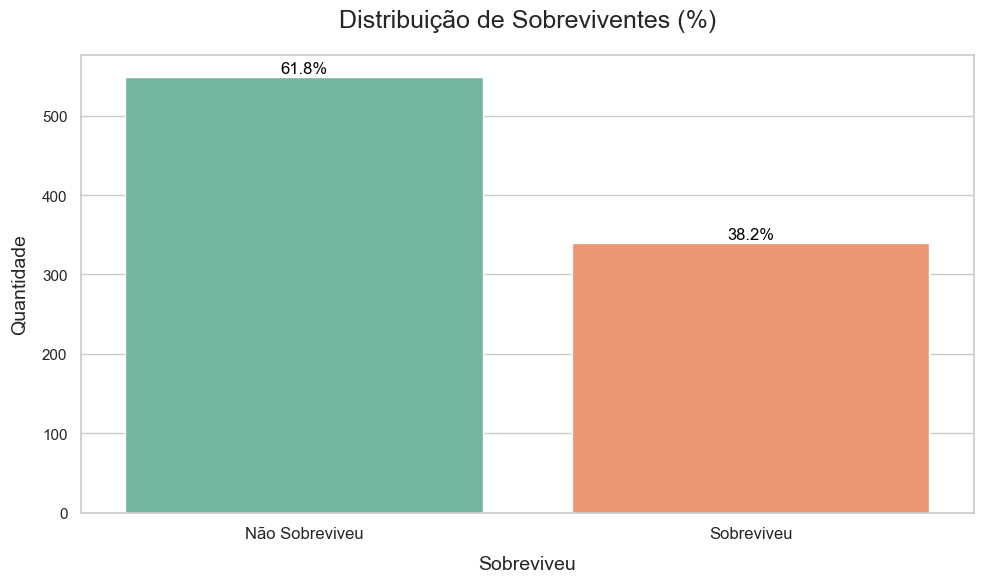

In [213]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=processed_data, x='Survived', palette='Set2')
for p in ax.patches:
    percentage = f"{100 * p.get_height() / len(processed_data):.1f}%"
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., p.get_height() + 10),  
                ha='center', va='center', fontsize=12, color='black')
ax.set_title('Distribuição de Sobreviventes (%)', fontsize=18, pad=20)
ax.set_xlabel('Sobreviveu', fontsize=14, labelpad=10)
ax.set_ylabel('Quantidade', fontsize=14, labelpad=10)
ax.set_xticklabels(['Não Sobreviveu', 'Sobreviveu'], fontsize=12)
plt.tight_layout()
plt.show()


### Plot 2: Idade por Sobrevivência


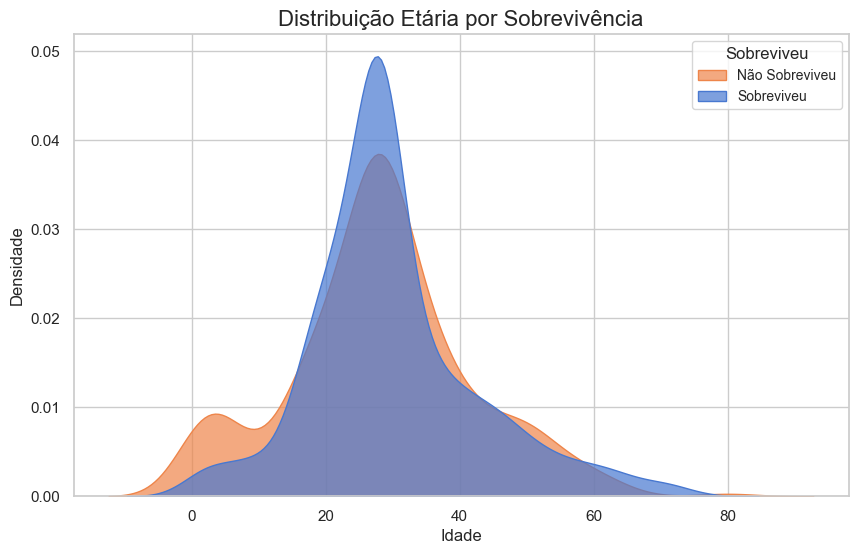

In [214]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=processed_data, x='Age', hue='Survived', fill=True, common_norm=False, palette='muted', alpha=0.7)
plt.title('Distribuição Etária por Sobrevivência', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend(title='Sobreviveu', labels=['Não Sobreviveu', 'Sobreviveu'], fontsize=10)
plt.show()


### Plot 3: Sobrevivência por Gênero e Classe

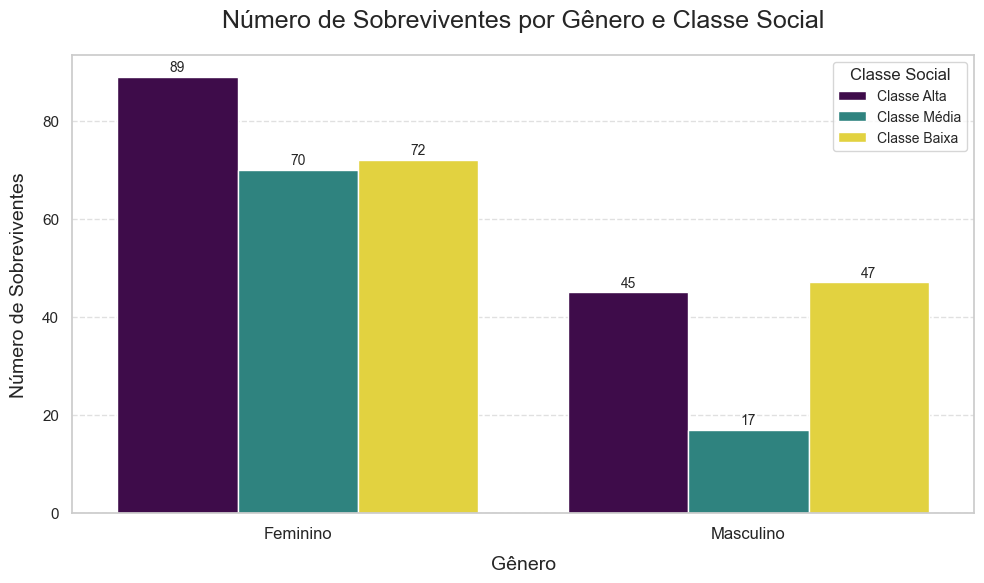

In [215]:
plt.figure(figsize=(10, 6))

survivors_data = processed_data[processed_data['Survived'] == 1].groupby(['Sex', 'Pclass']).size().reset_index(name='Count')

sns.barplot(data=survivors_data, x='Sex', y='Count', hue='Pclass', palette='viridis')

plt.title('Número de Sobreviventes por Gênero e Classe Social', fontsize=18, pad=20)
plt.xlabel('Gênero', fontsize=14, labelpad=10)
plt.ylabel('Número de Sobreviventes', fontsize=14, labelpad=10)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Classe Alta', 'Classe Média', 'Classe Baixa'],
           title='Classe Social', fontsize=10, title_fontsize=12, loc='upper right', frameon=True, shadow=False)

plt.xticks([0, 1], ['Feminino', 'Masculino'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=2)

plt.tight_layout()
plt.show()


### Plot 4: Tarifa paga (Fare) por Sobrevivência

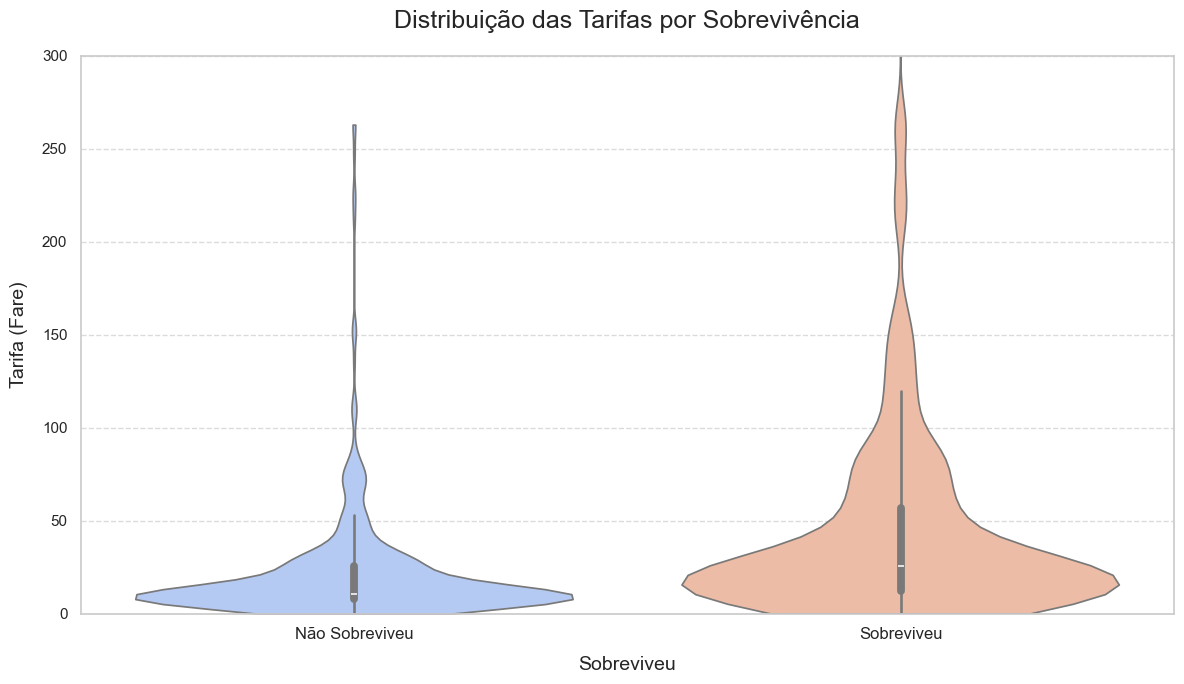

In [216]:
plt.figure(figsize=(12, 7))

sns.violinplot(data=processed_data, x='Survived', y='Fare', palette='coolwarm', bw=0.2, cut=0, scale='width')

plt.title('Distribuição das Tarifas por Sobrevivência', fontsize=18, pad=20)
plt.xlabel('Sobreviveu', fontsize=14, labelpad=10)
plt.ylabel('Tarifa (Fare)', fontsize=14, labelpad=10)
plt.xticks([0, 1], ['Não Sobreviveu', 'Sobreviveu'], fontsize=12)
plt.ylim(0, 300)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Plot 5: Taxa de sobrevivência por Presença de Cabine

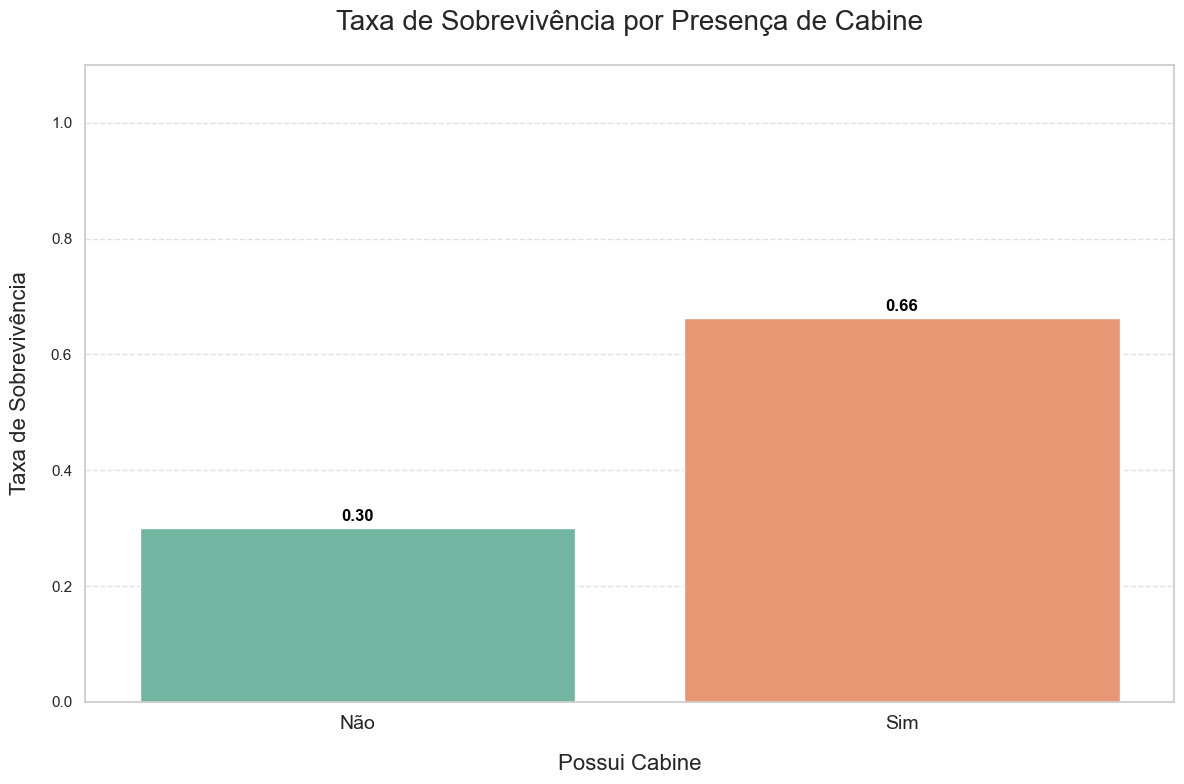

In [217]:
plt.figure(figsize=(12, 8))

ax = sns.barplot(data=processed_data, x='Has_Cabin', y='Survived', palette='Set2', ci=None)

for p in ax.patches:
    value = f"{p.get_height():.2f}"
    ax.annotate(value,
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.02),
                ha='center', va='center', fontsize=12, color='black', weight='bold')

ax.set_title('Taxa de Sobrevivência por Presença de Cabine', fontsize=20, pad=25)
ax.set_xlabel('Possui Cabine', fontsize=16, labelpad=15)
ax.set_ylabel('Taxa de Sobrevivência', fontsize=16, labelpad=15)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Não', 'Sim'], fontsize=14)

plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### Plot 6: Taxa de sobrevivência por Ponto de Embarque e Classe

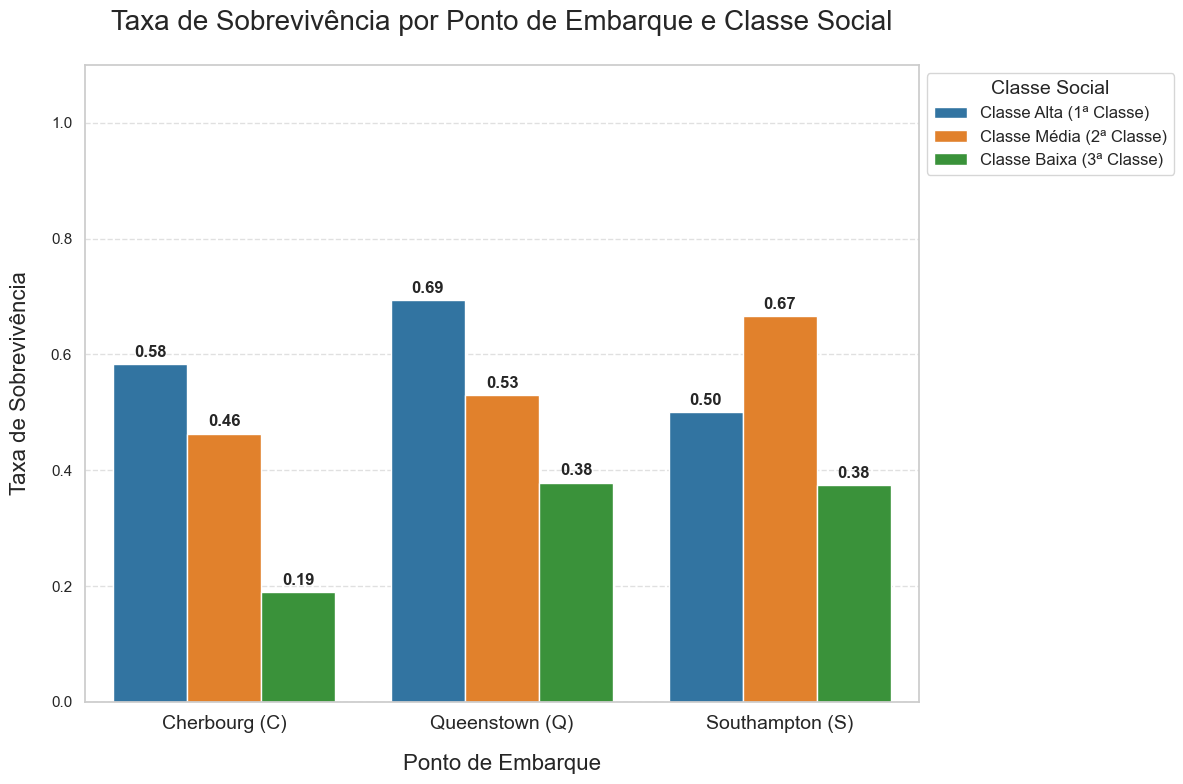

In [218]:
plt.figure(figsize=(12, 8))

ax = sns.barplot(data=processed_data, x='Embarked', y='Survived', hue='Pclass', 
                 palette=['#1f77b4', '#ff7f0e', '#2ca02c'], ci=None)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=12, padding=3, weight='bold')

ax.set_title('Taxa de Sobrevivência por Ponto de Embarque e Classe Social', fontsize=20, pad=25)
ax.set_xlabel('Ponto de Embarque', fontsize=16, labelpad=15)
ax.set_ylabel('Taxa de Sobrevivência', fontsize=16, labelpad=15)

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'], fontsize=14)

plt.legend(title='Classe Social', fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1),
           labels=['Classe Alta (1ª Classe)', 'Classe Média (2ª Classe)', 'Classe Baixa (3ª Classe)'])

plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


# Aplicando Machine Learning


In [219]:
import numpy as np

from numpy import astype

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)

from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

## Análise dos dados


In [220]:
data = processed_data

print(tabulate(data.head(), headers='keys', showindex=True, tablefmt='grid'))

+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+------------+-------------+
|    |   PassengerId |   Survived |   Pclass | Name                                                | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Embarked   |   Has_Cabin |
+====+===============+============+==========+=====================================================+========+=======+=========+=========+==================+=========+============+=============+
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | S          |           0 |
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+------------+-------------+
|  1 |             2 |        

### Aplicando Encoder para variáveis categóricas

In [221]:
def preprocess_data(data, is_training=True):
    """
    Função para pré-processar os dados do Titanic
    
    Parâmetros:
    data (pd.DataFrame): DataFrame a ser processado
    is_training (bool): Indica se é conjunto de treino (True) ou teste (False)
    
    Retorna:
    pd.DataFrame: DataFrame processado
    dict: Dicionário com os encoders/scalers utilizados (apenas se is_training=True)
    """

    processed_data = data.copy()
    
    transformers = {}
    
    if is_training:
        transformers['le_sex'] = LabelEncoder()
        transformers['le_embarked'] = LabelEncoder()
        
        processed_data['Sex'] = transformers['le_sex'].fit_transform(processed_data['Sex'])
        processed_data['Embarked'] = transformers['le_embarked'].fit_transform(processed_data['Embarked'])
    else:
        processed_data['Sex'] = le_sex.transform(processed_data['Sex'])
        processed_data['Embarked'] = le_embarked.transform(processed_data['Embarked'])
    
    numeric_columns = ['Age', 'Fare', 'SibSp', 'Parch']
    
    if is_training:
        transformers['scaler'] = StandardScaler()
        processed_data[numeric_columns] = transformers['scaler'].fit_transform(processed_data[numeric_columns])
    else:
        processed_data[numeric_columns] = scaler.transform(processed_data[numeric_columns])
    
    columns_to_drop = ['PassengerId', 'Ticket', 'Name']
    processed_data = processed_data.drop(columns=columns_to_drop)
    
    print("\nDados após o pré-processamento:")
    print(tabulate(processed_data.head(5), headers='keys', showindex=True, tablefmt='grid'))
    
    if is_training:
        print("\nMapeamento das variáveis categóricas:")
        print("Sex:", dict(zip(transformers['le_sex'].classes_, transformers['le_sex'].transform(transformers['le_sex'].classes_))))
        print("Embarked:", dict(zip(transformers['le_embarked'].classes_, transformers['le_embarked'].transform(transformers['le_embarked'].classes_))))
        return processed_data, transformers
        
    return processed_data


# Para dados de treino:
processed_data, transformers = preprocess_data(data, is_training=True)
le_sex = transformers['le_sex']
le_embarked = transformers['le_embarked'] 
scaler = transformers['scaler']

# Para dados de teste:
processed_test_data = preprocess_data(test_data_processed, is_training=False)


Dados após o pré-processamento:
+----+------------+----------+-------+-----------+-----------+-----------+-----------+------------+-------------+
|    |   Survived |   Pclass |   Sex |       Age |     SibSp |     Parch |      Fare |   Embarked |   Has_Cabin |
+====+============+==========+=======+===========+===========+===========+===========+============+=============+
|  0 |          0 |        3 |     1 | -0.563674 |  0.43135  | -0.474326 | -0.50024  |          2 |           0 |
+----+------------+----------+-------+-----------+-----------+-----------+-----------+------------+-------------+
|  1 |          1 |        1 |     0 |  0.669217 |  0.43135  | -0.474326 |  0.788947 |          0 |           1 |
+----+------------+----------+-------+-----------+-----------+-----------+-----------+------------+-------------+
|  2 |          1 |        3 |     0 | -0.255451 | -0.475199 | -0.474326 | -0.48665  |          2 |           0 |
+----+------------+----------+-------+-----------+-----

In [222]:

# data = processed_data.copy()

# le_sex = LabelEncoder()
# le_embarked = LabelEncoder()

# data['Sex'] = le_sex.fit_transform(data['Sex'])
# data['Embarked'] = le_embarked.fit_transform(data['Embarked'])

# print("\nDados após encoding:")
# print(tabulate(data.head(10), headers='keys', showindex=True, tablefmt='grid'))

# sex_mapping = {
#     'female': 0,
#     'male': 1
# }

# embarked_mapping = {
#     'C': 0,  # Cherbourg
#     'Q': 1,  # Queenstown
#     'S': 2   # Southampton
# }

# print("\nMapeamento Sex:", dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_))))
# print("Mapeamento Embarked:", dict(zip(le_embarked.classes_, le_embarked.transform(le_embarked.classes_))))


### Aplicando normalização das features

In [223]:
# numeric_columns = ['Age', 'Fare', 'SibSp', 'Parch']

# scaler = StandardScaler()

# data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# print("\nDados após normalização:")
# print(tabulate(data.head(10), headers='keys', showindex=True, tablefmt='grid'))

### Dropando colunas que não serão utilizadas

In [224]:
# columns_to_drop = ['PassengerId', 'Ticket', 'Name']  
# data = data.drop(columns=columns_to_drop)

# print("\nColunas mantidas no dataset:")
# print(data.columns.tolist())

# print(tabulate(data.head(10), headers='keys', showindex=True, tablefmt='grid'))

### Aplicando o mesmo processo para os dados de teste

### Separando os dados entre treino, validação e teste

In [225]:

data = processed_data

# print("\nDados antes da separação:")
# print(tabulate(data.head(10), headers='keys', showindex=True, tablefmt='grid'))

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,   
    random_state=42,
    stratify=y
)

X_test = processed_test_data.copy()

print(tabulate(X_test.head(-1), headers='keys', showindex=True, tablefmt='grid'))

+-----+----------+-------+------------+-----------+-----------+-------------+------------+-------------+
|     |   Pclass |   Sex |        Age |     SibSp |     Parch |        Fare |   Embarked |   Has_Cabin |
+=====+==========+=======+============+===========+===========+=============+============+=============+
|   0 |        3 |     1 |  0.399522  | -0.475199 | -0.474326 | -0.488579   |          1 |           0 |
+-----+----------+-------+------------+-----------+-----------+-------------+------------+-------------+
|   1 |        3 |     0 |  1.36272   |  0.43135  | -0.474326 | -0.505273   |          2 |           0 |
+-----+----------+-------+------------+-----------+-----------+-------------+------------+-------------+
|   2 |        2 |     1 |  2.51855   | -0.475199 | -0.474326 | -0.451165   |          1 |           0 |
+-----+----------+-------+------------+-----------+-----------+-------------+------------+-------------+
|   3 |        3 |     1 | -0.178396  | -0.475199 | -0.

In [226]:
print("\nTamanho dos conjuntos:")
print(tabulate({
    'Conjunto': ['Treino', 'Validação', 'Teste'],
    'Amostras': [X_train.shape[0], X_val.shape[0], X_test.shape[0]],
    'Proporção': [
        f"{X_train.shape[0]/len(X):.1%}",
        f"{X_val.shape[0]/len(X):.1%}"
    ]
}, headers='keys', tablefmt='grid'))


Tamanho dos conjuntos:
+------------+------------+-------------+
| Conjunto   |   Amostras | Proporção   |
+============+============+=============+
| Treino     |        711 | 80.0%       |
+------------+------------+-------------+
| Validação  |        178 | 20.0%       |
+------------+------------+-------------+
| Teste      |        418 |             |
+------------+------------+-------------+


In [227]:
print("\nDistribuição das classes:")
print(tabulate({
    'Conjunto': ['Treino', 'Treino', 'Validação', 'Validação'],
    'Classe': [0, 1, 0, 1, 0, 1],
    'Proporção': [
        y_train.value_counts(normalize=True)[0],
        y_train.value_counts(normalize=True)[1],
        y_val.value_counts(normalize=True)[0], 
        y_val.value_counts(normalize=True)[1],
    ]
}, headers='keys', tablefmt='grid', floatfmt='.2%'))

print('Note que as proporções foram mantidas')


Distribuição das classes:
+------------+----------+-------------+
| Conjunto   |   Classe |   Proporção |
+============+==========+=============+
| Treino     |        0 |      61.74% |
+------------+----------+-------------+
| Treino     |        1 |      38.26% |
+------------+----------+-------------+
| Validação  |        0 |      61.80% |
+------------+----------+-------------+
| Validação  |        1 |      38.20% |
+------------+----------+-------------+
|            |        0 |             |
+------------+----------+-------------+
|            |        1 |             |
+------------+----------+-------------+
Note que as proporções foram mantidas


### Definindo a validação cruzada, oversample, métricas, pipeline para os modelos e grid de parâmetros

Antes do SMOTE:

Distribuição original das classes:
Classe 0: 439 amostras (61.7%)
Classe 1: 272 amostras (38.3%)


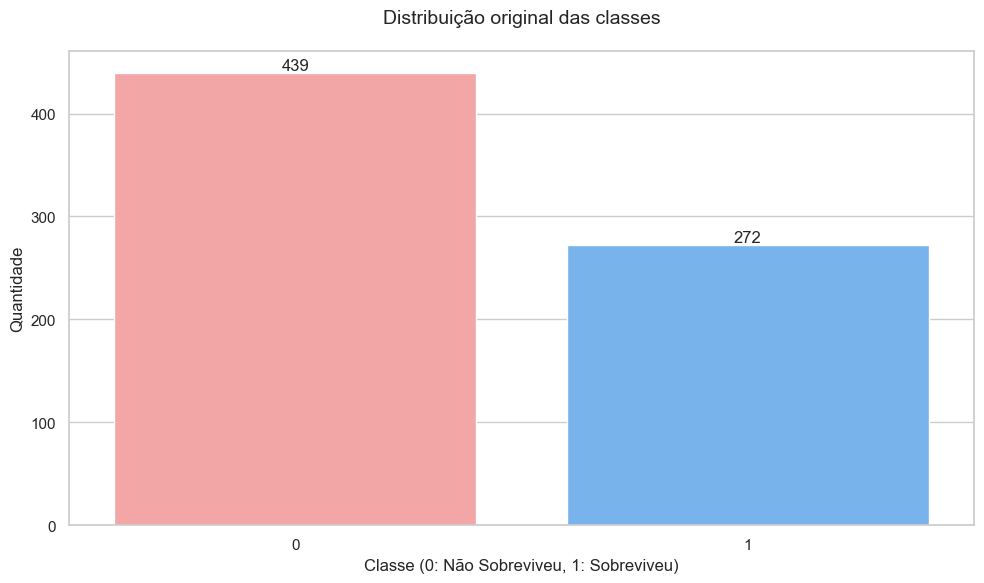


Após SMOTE:

Distribuição das classes após SMOTE:
Classe 0: 439 amostras (50.0%)
Classe 1: 439 amostras (50.0%)


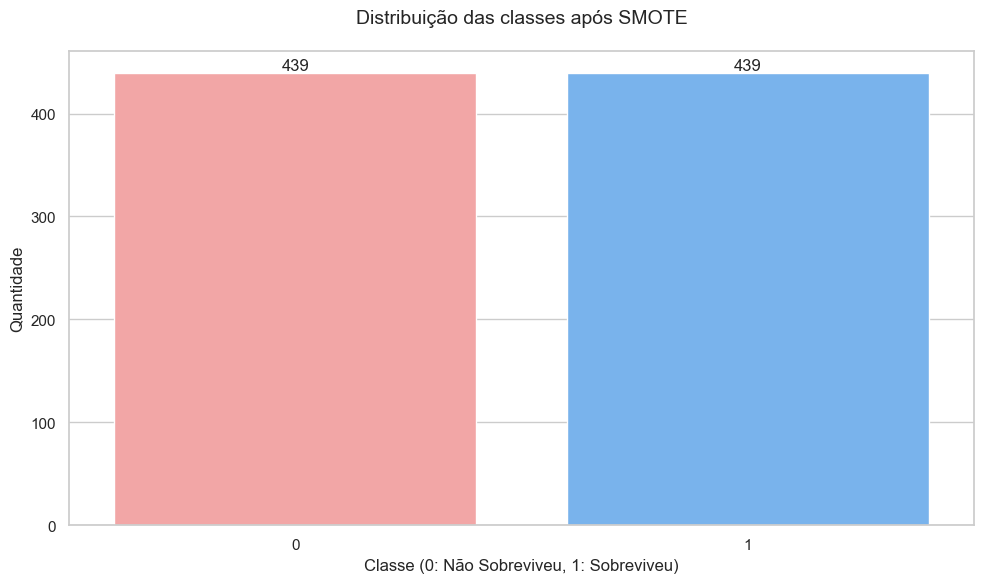

In [228]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('default')  
import seaborn as sns
sns.set_theme(style="whitegrid")  

def check_balance(X, y, title="Distribuição das classes"):
    unique, counts = np.unique(y.astype(int), return_counts=True)
    print(f"\n{title}:")
    for classe, count in zip(unique, counts):
        print(f"Classe {classe}: {count} amostras ({count/len(y):.1%})")

    plt.figure(figsize=(10, 6))
    sns.countplot(data=pd.DataFrame({'Classe': y}), x='Classe', 
                 order=[0, 1],
                 palette=['#ff9999', '#66b3ff'])
    
    plt.title(title, fontsize=14, pad=20)
    plt.xlabel('Classe (0: Não Sobreviveu, 1: Sobreviveu)', fontsize=12)
    plt.ylabel('Quantidade', fontsize=12)

    for i, count in enumerate(counts):
        plt.text(i, count, str(count), 
                horizontalalignment='center',
                verticalalignment='bottom')
    
    plt.tight_layout()
    plt.show()

print("Antes do SMOTE:")
check_balance(X_train, y_train, "Distribuição original das classes")

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nApós SMOTE:")
check_balance(X_train_resampled, y_train_resampled, 
             "Distribuição das classes após SMOTE")

In [229]:
# Definindo métricas de avaliação
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

In [230]:
# Configurando validação cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [231]:
# Pipeline para KNN
knn_pipeline = ImbPipeline([
    ('sampler', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier())
])

# Parâmetros para KNN
knn_params = {
    'sampler': [SMOTE(random_state=42), RandomUnderSampler(random_state=42)],
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
    'classifier__p': [1, 2, 3]  
}

In [232]:
# Pipeline para Random Forest
rf_pipeline = ImbPipeline([
    ('sampler', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))  
])

# Parâmetros reduzidos para Random Forest
rf_params = {
    'sampler': [SMOTE(random_state=42)],  
    'classifier__n_estimators': [200, 300, 400],  
    'classifier__max_depth': [10, 15, 20, None],  
    'classifier__min_samples_split': [2, 5],  
    'classifier__min_samples_leaf': [1, 4],  
    'classifier__max_features': ['sqrt', 'log2', None],  
    'classifier__class_weight': ['balanced', None],  
    'classifier__criterion': ['gini', 'entropy']  
}


In [233]:
# Função para treinar e avaliar modelo
def train_and_evaluate_model(pipeline, params, name):
    grid_search = GridSearchCV(
        pipeline,
        params,
        cv=cv,
        scoring=scoring,
        refit='f1',
        n_jobs=-1,
        verbose=1,
        return_train_score=True
    )
    
    # Treinamento
    grid_search.fit(X_train, y_train)
    
    # Melhores parâmetros
    print(f"\nMelhores parâmetros para {name}:")
    print(grid_search.best_params_)
    
    # Avaliação no conjunto de validação
    y_val_pred = grid_search.predict(X_val)
    
    print(f"\nResultados de validação para {name}:")
    print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.3f}")
    print(f"Precision: {precision_score(y_val, y_val_pred):.3f}")
    print(f"Recall: {recall_score(y_val, y_val_pred):.3f}")
    print(f"F1-score: {f1_score(y_val, y_val_pred):.3f}")
    print(f"ROC AUC: {roc_auc_score(y_val, y_val_pred):.3f}")
    
    return grid_search

In [234]:
# Treinando KNN

print("Treinando KNN...")
knn_model = train_and_evaluate_model(knn_pipeline, knn_params, "KNN")

Treinando KNN...
Fitting 5 folds for each of 336 candidates, totalling 1680 fits



Melhores parâmetros para KNN:
{'classifier__metric': 'manhattan', 'classifier__n_neighbors': 13, 'classifier__p': 1, 'classifier__weights': 'uniform', 'sampler': SMOTE(random_state=42)}

Resultados de validação para KNN:
Accuracy: 0.775
Precision: 0.675
Recall: 0.794
F1-score: 0.730
ROC AUC: 0.779


In [235]:
# Treinando Random Forest

print("\nTreinando Random Forest...")
rf_model = train_and_evaluate_model(rf_pipeline, rf_params, "Random Forest")


Treinando Random Forest...
Fitting 5 folds for each of 576 candidates, totalling 2880 fits

Melhores parâmetros para Random Forest:
{'classifier__class_weight': 'balanced', 'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200, 'sampler': SMOTE(random_state=42)}

Resultados de validação para Random Forest:
Accuracy: 0.826
Precision: 0.776
Recall: 0.765
F1-score: 0.770
ROC AUC: 0.814


In [236]:
gender_submission = pd.read_csv('../data/gender_submission.csv')
y_test = gender_submission['Survived']


X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

def final_evaluation(model, name):
    y_test_pred = model.predict(X_test)
    
    print(f"\nResultados finais de teste para {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.3f}")
    print(f"Precision: {precision_score(y_test, y_test_pred):.3f}")
    print(f"Recall: {recall_score(y_test, y_test_pred):.3f}")
    print(f"F1-score: {f1_score(y_test, y_test_pred):.3f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_test_pred):.3f}")
    
final_evaluation(knn_model, "KNN")
final_evaluation(rf_model, "Random Forest")


Resultados finais de teste para KNN:
Accuracy: 0.840
Precision: 0.725
Recall: 0.901
F1-score: 0.804
ROC AUC: 0.853

Matriz de Confusão:
[[214  52]
 [ 15 137]]

Resultados finais de teste para Random Forest:
Accuracy: 0.861
Precision: 0.805
Recall: 0.816
F1-score: 0.810
ROC AUC: 0.852

Matriz de Confusão:
[[236  30]
 [ 28 124]]


In [237]:
# Avaliação final
final_evaluation(knn_model, "KNN")
final_evaluation(rf_model, "Random Forest")


Resultados finais de teste para KNN:
Accuracy: 0.840
Precision: 0.725
Recall: 0.901
F1-score: 0.804
ROC AUC: 0.853

Matriz de Confusão:
[[214  52]
 [ 15 137]]

Resultados finais de teste para Random Forest:
Accuracy: 0.861
Precision: 0.805
Recall: 0.816
F1-score: 0.810
ROC AUC: 0.852

Matriz de Confusão:
[[236  30]
 [ 28 124]]


In [238]:
# Feature importance para Random Forest
if hasattr(rf_model.best_estimator_.named_steps['classifier'], 'feature_importances_'):
    importances = rf_model.best_estimator_.named_steps['classifier'].feature_importances_
    features = X_train.columns
    
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
    print("\nImportância das Features (Random Forest):")
    print(feature_importance)


Importância das Features (Random Forest):
     feature  importance
1        Sex    0.290697
5       Fare    0.243894
2        Age    0.215615
0     Pclass    0.083119
3      SibSp    0.061122
4      Parch    0.039655
6   Embarked    0.034812
7  Has_Cabin    0.031086


### Aplicando otimização Bayesiana

In [239]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

rf_bayes_space = {
    'classifier__n_estimators': Integer(100, 1000, name='n_estimators'),
    'classifier__max_depth': Integer(3, 50, name='max_depth'),
    'classifier__min_samples_split': Integer(2, 20, name='min_samples_split'),
    'classifier__min_samples_leaf': Integer(1, 10, name='min_samples_leaf'),
    'classifier__max_features': Categorical(['sqrt', 'log2', None], name='max_features'),  # Removido 'auto'
    'classifier__max_leaf_nodes': Categorical([None, 50, 100, 200], name='max_leaf_nodes'),
    'classifier__min_impurity_decrease': Real(0.0, 0.2, name='min_impurity_decrease'),
    'classifier__bootstrap': Categorical([True, False], name='bootstrap'),
    'classifier__class_weight': Categorical(['balanced', 'balanced_subsample', None], name='class_weight'),
    'classifier__criterion': Categorical(['gini', 'entropy', 'log_loss'], name='criterion'),
    'sampler': Categorical([
        SMOTE(random_state=42),
        RandomUnderSampler(random_state=42),
        SMOTE(random_state=42, k_neighbors=3),
        SMOTE(random_state=42, k_neighbors=5),
        SMOTE(random_state=42, k_neighbors=7)
    ], name='sampler')
}

knn_bayes_space = {
    'classifier__n_neighbors': Integer(1, 50, name='n_neighbors'),
    'classifier__weights': Categorical(['uniform', 'distance'], name='weights'),
    'classifier__metric': Categorical([
        'euclidean', 'manhattan', 'minkowski', 'chebyshev'
    ], name='metric'),
    'classifier__p': Integer(1, 5, name='p'),  # Para distância de Minkowski
    'classifier__leaf_size': Integer(10, 100, name='leaf_size'),
    'classifier__algorithm': Categorical(['auto', 'ball_tree', 'kd_tree', 'brute'], name='algorithm'),
    'sampler': Categorical([
        SMOTE(random_state=42),
        RandomUnderSampler(random_state=42),
        SMOTE(random_state=42, k_neighbors=3),
        SMOTE(random_state=42, k_neighbors=5),
        SMOTE(random_state=42, k_neighbors=7)
    ], name='sampler')
}

def train_with_bayes_opt(pipeline, search_space, name, n_iter=100):
    bayes_search = BayesSearchCV(
        pipeline,
        search_space,
        n_iter=n_iter,
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        verbose=2,
        return_train_score=True,
        random_state=42
    )
    
    print(f"\nTreinando {name} com Otimização Bayesiana...")
    print(f"Número de iterações: {n_iter}")
    
    bayes_search.fit(X_train, y_train)
    
    print(f"\nMelhores parâmetros para {name}:")
    print(bayes_search.best_params_)
    
    y_val_pred = bayes_search.predict(X_val)
    
    print(f"\nResultados de validação para {name}:")
    print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.3f}")
    print(f"Precision: {precision_score(y_val, y_val_pred):.3f}")
    print(f"Recall: {recall_score(y_val, y_val_pred):.3f}")
    print(f"F1-score: {f1_score(y_val, y_val_pred):.3f}")
    print(f"ROC AUC: {roc_auc_score(y_val, y_val_pred):.3f}")
    
    return bayes_search

knn_bayes = train_with_bayes_opt(knn_pipeline, knn_bayes_space, "KNN", n_iter=100)
rf_bayes = train_with_bayes_opt(rf_pipeline, rf_bayes_space, "Random Forest", n_iter=100)


Treinando KNN com Otimização Bayesiana...
Número de iterações: 100
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, total

### Por curiosidade, vamos verificar o desempenho do XGBoost

In [240]:
from xgboost import XGBClassifier

# Pipeline para XGBoost
xgb_pipeline = ImbPipeline([
    ('sampler', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(random_state=42))
])

# Espaço de busca para XGBoost
xgb_bayes_space = {
    'classifier__n_estimators': Integer(100, 1000, name='n_estimators'),
    'classifier__max_depth': Integer(3, 15, name='max_depth'),
    'classifier__learning_rate': Real(0.01, 0.3, prior='log-uniform', name='learning_rate'),
    'classifier__min_child_weight': Integer(1, 7, name='min_child_weight'),
    'classifier__gamma': Real(0, 1, name='gamma'),
    'classifier__subsample': Real(0.5, 1.0, name='subsample'),
    'classifier__colsample_bytree': Real(0.5, 1.0, name='colsample_bytree'),
    'classifier__reg_alpha': Real(0.0001, 1, prior='log-uniform', name='reg_alpha'),
    'classifier__reg_lambda': Real(0.0001, 1, prior='log-uniform', name='reg_lambda'),
    'classifier__scale_pos_weight': Real(1, 5, name='scale_pos_weight'),
    'classifier__max_delta_step': Integer(0, 10, name='max_delta_step'),
    'sampler': Categorical([
        SMOTE(random_state=42),
        RandomUnderSampler(random_state=42),
        SMOTE(random_state=42, k_neighbors=3),
        SMOTE(random_state=42, k_neighbors=5),
        SMOTE(random_state=42, k_neighbors=7)
    ], name='sampler')
}

# Função para treinar XGBoost com otimização bayesiana
def train_xgb_with_bayes(n_iter=100):
    bayes_search = BayesSearchCV(
        xgb_pipeline,
        xgb_bayes_space,
        n_iter=n_iter,
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        verbose=2,
        return_train_score=True,
        random_state=42
    )
    
    print("\nTreinando XGBoost com Otimização Bayesiana...")
    print(f"Número de iterações: {n_iter}")
    
    bayes_search.fit(X_train, y_train)
    
    print("\nMelhores parâmetros para XGBoost:")
    print(bayes_search.best_params_)
    

    y_val_pred = bayes_search.predict(X_val)
    
    print("\nResultados de validação para XGBoost:")
    print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.3f}")
    print(f"Precision: {precision_score(y_val, y_val_pred):.3f}")
    print(f"Recall: {recall_score(y_val, y_val_pred):.3f}")
    print(f"F1-score: {f1_score(y_val, y_val_pred):.3f}")
    print(f"ROC AUC: {roc_auc_score(y_val, y_val_pred):.3f}")
    
    if hasattr(bayes_search.best_estimator_.named_steps['classifier'], 'feature_importances_'):
        importances = bayes_search.best_estimator_.named_steps['classifier'].feature_importances_
        features = X_train.columns
        
        feature_importance = pd.DataFrame({
            'feature': features,
            'importance': importances
        }).sort_values('importance', ascending=False)
        
        print("\nImportância das Features (XGBoost):")
        print(feature_importance)
    
    return bayes_search


xgb_bayes = train_xgb_with_bayes(n_iter=100)

print("\nResultados finais no conjunto de teste:")
final_evaluation(xgb_bayes, "XGBoost")


Treinando XGBoost com Otimização Bayesiana...
Número de iterações: 100
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, t

### Matrizes de Confusão

In [245]:
def plot_confusion_matrix(y_true, y_pred, title):
    
    cm = confusion_matrix(y_true, y_pred)
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    
    # Plot da matriz de confusão
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Não Sobreviveu', 'Sobreviveu'],
                yticklabels=['Não Sobreviveu', 'Sobreviveu'])
    plt.title(f'Matriz de Confusão - {title}', pad=20)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()
    
    # Calcula métricas detalhadas
    tn, fp, fn, tp = cm.ravel()
    especificidade = tn / (tn + fp)
    sensibilidade = tp / (tp + fn)
    
    print(f"\nMétricas detalhadas - {title}:")
    print(f"Verdadeiros Negativos (TN): {tn}")
    print(f"Falsos Positivos (FP): {fp}")
    print(f"Falsos Negativos (FN): {fn}")
    print(f"Verdadeiros Positivos (TP): {tp}")
    print(f"Especificidade: {especificidade:.3f}")
    print(f"Sensibilidade: {sensibilidade:.3f}")
    
    print(f"\nMétricas de avaliação - {title}:")
    print(f"Acurácia: {accuracy:.3f}")
    print(f"Precisão: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print(f"ROC AUC: {roc_auc:.3f}")

Matriz de Confusão - KNN


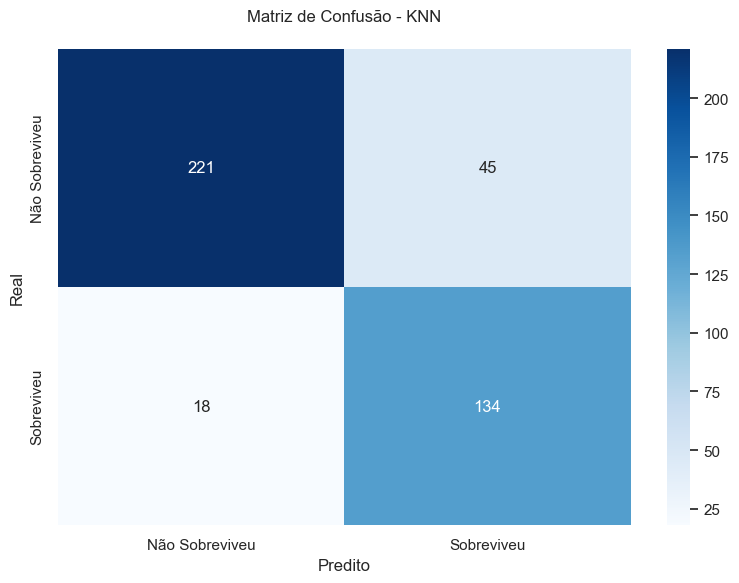


Métricas detalhadas - KNN:
Verdadeiros Negativos (TN): 221
Falsos Positivos (FP): 45
Falsos Negativos (FN): 18
Verdadeiros Positivos (TP): 134
Especificidade: 0.831
Sensibilidade: 0.882

Métricas de avaliação - KNN:
Acurácia: 0.849
Precisão: 0.749
Recall: 0.882
F1-Score: 0.810
ROC AUC: 0.856


In [246]:
print("Matriz de Confusão - KNN")
y_pred_knn = knn_bayes.predict(X_test)
plot_confusion_matrix(y_test, y_pred_knn, "KNN")


Matriz de Confusão - Random Forest


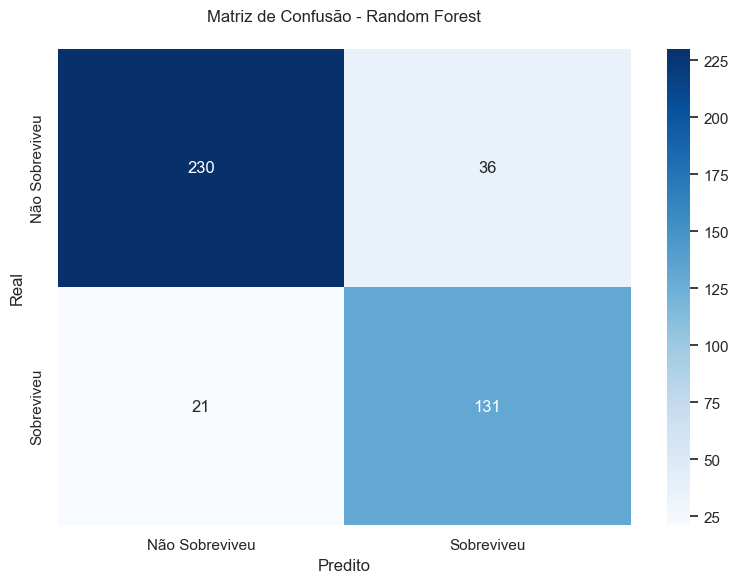


Métricas detalhadas - Random Forest:
Verdadeiros Negativos (TN): 230
Falsos Positivos (FP): 36
Falsos Negativos (FN): 21
Verdadeiros Positivos (TP): 131
Especificidade: 0.865
Sensibilidade: 0.862

Métricas de avaliação - Random Forest:
Acurácia: 0.864
Precisão: 0.784
Recall: 0.862
F1-Score: 0.821
ROC AUC: 0.863


In [247]:
print("\nMatriz de Confusão - Random Forest")
y_pred_rf = rf_bayes.predict(X_test)
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")


Matriz de Confusão - XGBoost


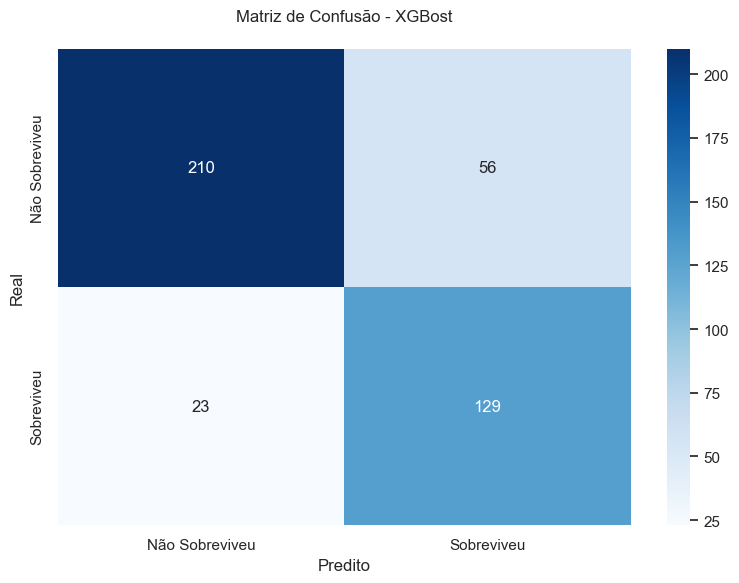


Métricas detalhadas - XGBost:
Verdadeiros Negativos (TN): 210
Falsos Positivos (FP): 56
Falsos Negativos (FN): 23
Verdadeiros Positivos (TP): 129
Especificidade: 0.789
Sensibilidade: 0.849

Métricas de avaliação - XGBost:
Acurácia: 0.811
Precisão: 0.697
Recall: 0.849
F1-Score: 0.766
ROC AUC: 0.819


In [248]:
print("\nMatriz de Confusão - XGBoost")
y_pred_xgb = xgb_bayes.predict(X_test)
plot_confusion_matrix(y_test, y_pred_xgb, "XGBost")